# Normalized Energy Output

### Definition 

**Normalized Energy Output (NEO)** is a metric used to measure the energy production of an inverter relative to its rated capacity. It is calculated by dividing the actual energy produced by the inverter (measured in kWh) by the inverter's rated capacity (measured in kW). This provides a dimensionless value that allows for easy comparison between different inverters regardless of their size.

Formula:

NEO(kwh/kw) = PV_Production/Rated Capacity 

Where:
- **PV Production**: Energy produced by the inverter (in kWh).
- **Rated Capacity**: Maximum energy the inverter can produce (in kW).



### 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading Data

In [2]:
# Load each inverter's data into separate DataFrames
inv1 = pd.read_excel("inv1.xlsx")
inv2 = pd.read_excel("Inv2.xlsx")
inv3 = pd.read_excel("inv3.xlsx")
inv4 = pd.read_excel("inv4.xlsx")

### 3. EDA

In [3]:
inv1.head(3)

,date,inverter,pv_production,rated_capacity
0,2025-12-01,Inv1_215p,1.692851,215
1,2025-12-02,Inv1_215p,0.747736,215
2,2025-12-03,Inv1_215p,0.031793,215


In [4]:
inverters= [inv1, inv2, inv3, inv4]

### 4. Function for Normalized Energy Output

In [5]:
def normalized_energy_output(inverters):
    for df in inverters:
        df['normalized_energy_output'] = df['pv_production'] / df['rated_capacity'] 
    return inverters

In [6]:
#function call
noe= normalized_energy_output(inverters)

In [7]:
inv1.head(3)

,date,inverter,pv_production,rated_capacity,normalized_energy_output
0,2025-12-01,Inv1_215p,1.692851,215,0.007874
1,2025-12-02,Inv1_215p,0.747736,215,0.003478
2,2025-12-03,Inv1_215p,0.031793,215,0.000148


In [8]:
inv2.head(2)

,date,inverter,pv_production,rated_capacity,normalized_energy_output
0,2025-12-01,Inv2_105p,1.058967,105,0.010085
1,2025-12-02,Inv2_105p,0.444032,105,0.004229


### 5. Combine Data into a Single DataFrame - for Plotting

In [9]:
# Combine all inverters' data into a single DataFrame
combined_df = pd.concat(inverters)
combined_df

,date,inverter,pv_production,rated_capacity,normalized_energy_output
0,2025-12-01,Inv1_215p,1.692851,215,0.007874
1,2025-12-02,Inv1_215p,0.747736,215,0.003478
2,2025-12-03,Inv1_215p,0.031793,215,0.000148
3,2025-12-04,Inv1_215p,0.888522,215,0.004133
4,2025-12-05,Inv1_215p,1.098029,215,0.005107
...,...,...,...,...,...
20,2025-12-25,Inv4_105p,0.199435,105,0.001899
21,2025-12-26,Inv4_105p,0.188890,105,0.001799
22,2025-12-27,Inv4_105p,0.077744,105,0.000740
23,2025-12-28,Inv4_105p,0.210910,105,0.002009


### 7. Create Date Range for the Entire Month

In [10]:
# Ensure the 'date' column is in datetime format for proper plotting
combined_df['date'] = pd.to_datetime(combined_df['date'])

#ensure that all the dates in the range are available for plotting
date_range = pd.date_range(start=combined_df['date'].min(), end=combined_df['date'].max(), freq='D')

### 8. Plot

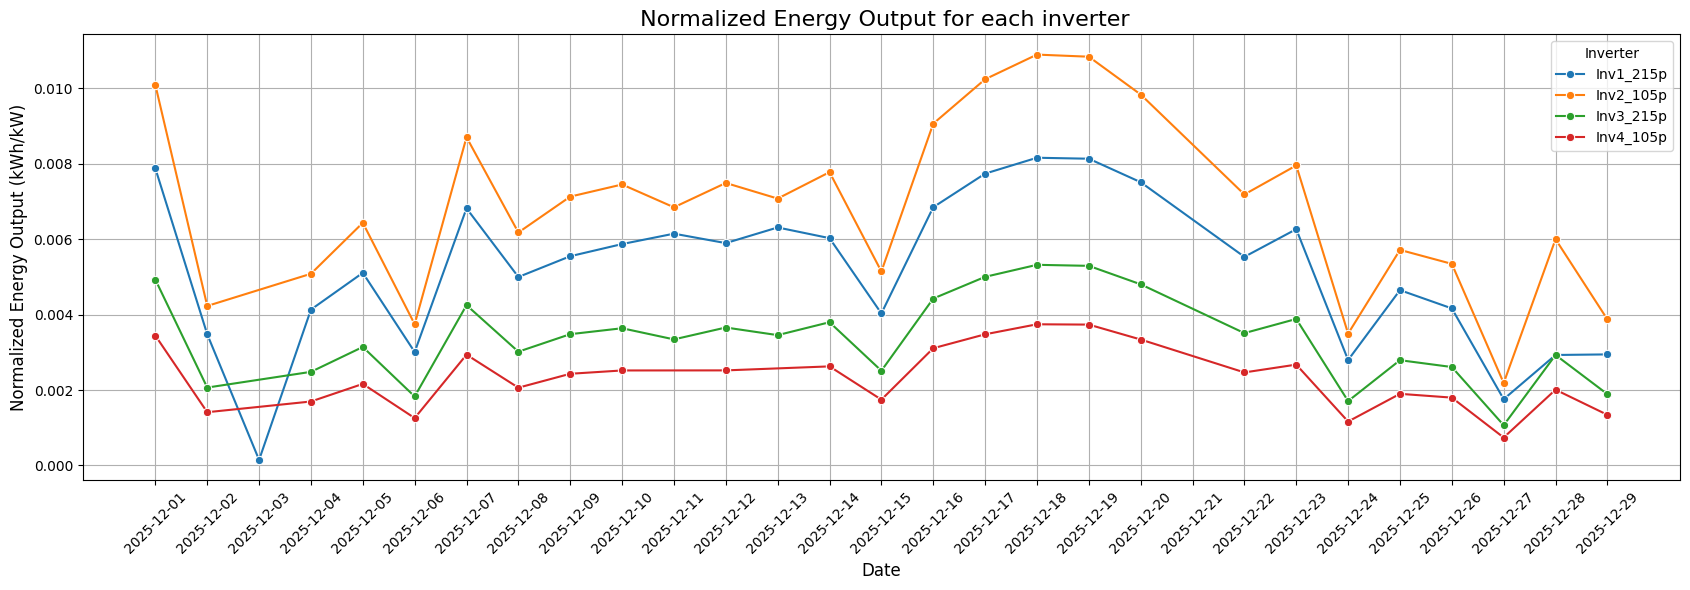

In [11]:

# Plotting Normalized Energy Output for each inverter (daily)
plt.figure(figsize=(17, 6))
sns.lineplot(data=combined_df, x='date', y='normalized_energy_output', hue='inverter', marker='o', palette='tab10')


plt.title(" Normalized Energy Output for each inverter", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Energy Output (kWh/kW)", fontsize=12)
plt.legend(title="Inverter", fontsize=10)
plt.xticks(date_range, rotation=45)  # Makes all dates are visible
plt.grid(True)
plt.tight_layout()
plt.show()


# Normalized Performance

### Definition
Normalized Performance provides a relative measure of an inverter's daily energy output compared to the best-performing inverter for the same day. This metric is helpful in identifying the relative efficiency of each inverter and detecting potential underperformance.

### Formula
The formula for calculating Normalized Performance is:

Normalized Performance = Normalized Energy Output (NEO)/Daily Best NEO

- **Daily Best NEO** is the highest NEO recorded across all inverters for a particular day.

---

### Steps to Calculate Normalized Performance

1. **Compute Normalized Energy Output (NEO):**
   - For each inverter, calculate the NEO by dividing its PV production by its rated capacity.

2. **Identify the Daily Best NEO:**
   - For each day, find the maximum NEO among all inverters.

3. **Calculate Normalized Performance:**
   - For each inverter, divide its NEO by the Daily Best NEO for the corresponding day.

4. **Add Normalized Performance as a New Column:**
   - Append the calculated Normalized Performance to the data for each inverter.


### Limitations of the Daily Best approach:
The daily best NEO might vary significantly due to environmental conditions (e.g., weather), which could make comparisons inconsistent.
This method is relative and does not provide an absolute benchmark for performance

but this can be good and reasonable for panels/inverters belonging to same site, like we have here from Metochi Site

In [18]:
# normalized energy output (NEO) is already calculated for inv1, inv2, inv3, and inv4
# Function to calculate normalized performance
def calculate_normalized_performance(inverters):

    # Step 2: Find the best normalized energy output (NEO) for each day
    best_noe_per_day = combined_df.groupby('date')['normalized_energy_output'].max()

    # Step 3: For each inverter, calculate the normalized performance
    for df in inverters:
        df['best_noe_per_day'] = df['date'].map(best_noe_per_day)  # Get the best NEO for each day
        df['normalized_performance'] = (df['normalized_energy_output'] / df['best_noe_per_day']) * 100
    return inverters

# Apply the function to calculate normalized performance
np = calculate_normalized_performance(inverters)
combined_df.tail(10)

,date,inverter,pv_production,rated_capacity,normalized_energy_output,best_noe_per_day,normalized_performance
97,2025-12-19,Inv4_105p,0.392146,105,0.003735,0.010836,34.465350
98,2025-12-20,Inv4_105p,0.350601,105,0.003339,0.009834,33.954556
99,2025-12-22,Inv4_105p,0.258990,105,0.002467,0.007184,34.333323
100,2025-12-23,Inv4_105p,0.280753,105,0.002674,0.007953,33.619122
101,2025-12-24,Inv4_105p,0.122283,105,0.001165,0.003495,33.321922
102,2025-12-25,Inv4_105p,0.199435,105,0.001899,0.005715,33.235798
103,2025-12-26,Inv4_105p,0.188890,105,0.001799,0.005344,33.660584
104,2025-12-27,Inv4_105p,0.077744,105,0.000740,0.002186,33.875813
105,2025-12-28,Inv4_105p,0.210910,105,0.002009,0.005998,33.489025
106,2025-12-29,Inv4_105p,0.140974,105,0.001343,0.003872,34.675306


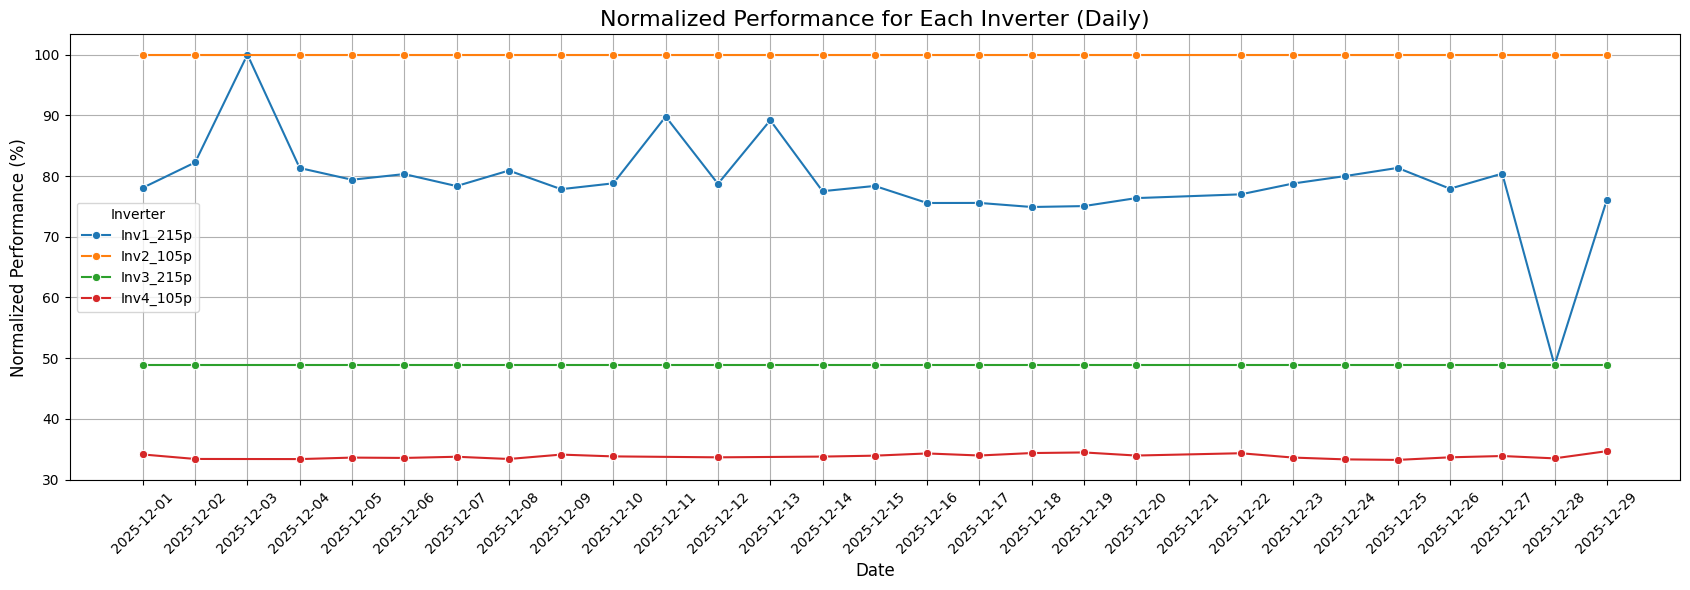

In [24]:

combined_df = pd.concat(inverters, ignore_index=True)
date_range = pd.date_range(start=combined_df['date'].min(), end=combined_df['date'].max(), freq='D')
plt.figure(figsize=(17, 6))
sns.lineplot(data=combined_df, x='date', y='normalized_performance', hue='inverter', marker='o', palette='tab10')
plt.title("Normalized Performance for Each Inverter (Daily)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Performance (%)", fontsize=12)
plt.xticks(date_range, rotation=45)  # Makes all dates are visible
plt.legend(title="Inverter", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()
